In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('./data.csv')
df.head()

,Duration,Distance
0,37.66,6151.0
1,54.06,7100.0
2,41.99,6834.0
3,42.44,6577.0
4,46.25,7254.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
Duration    100 non-null float64
Distance    100 non-null float64
dtypes: float64(2)
memory usage: 1.6 KB


In [4]:
df.describe()

,Duration,Distance
count,100.000000,100.000000
mean,47.615200,6884.450000
std,7.103066,431.337745
min,31.950000,6009.000000
25%,41.605000,6535.000000
50%,47.850000,6981.000000
75%,53.017500,7254.250000
max,63.700000,7612.000000


In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5,1,'Running Stats')

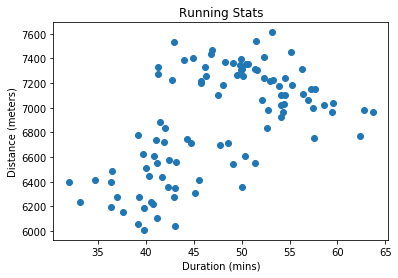

In [6]:
plt.scatter(df.Duration, df.Distance)
plt.xlabel('Duration (mins)')
plt.ylabel('Distance (meters)')
plt.title('Running Stats')

In [7]:
from sklearn.cluster import KMeans

In [8]:
kmeans = KMeans(n_clusters=3)

In [9]:
kmeans.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [10]:
y_kmeans = kmeans.predict(df)
y_kmeans

array([1, 0, 2, 1, 0, 0, 0, 1, 0, 2, 1, 1, 0, 1, 0, 1, 2, 2, 1, 1, 0, 2,
       2, 0, 2, 1, 2, 0, 0, 0, 0, 2, 0, 0, 1, 2, 2, 1, 2, 1, 0, 2, 1, 1,
       0, 2, 2, 0, 0, 2, 2, 0, 1, 1, 2, 0, 0, 2, 1, 0, 0, 0, 0, 2, 2, 0,
       1, 2, 0, 0, 0, 0, 2, 2, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 2, 2,
       1, 2, 2, 0, 0, 0, 0, 0, 1, 1, 0, 1])

In [11]:
centers = kmeans.cluster_centers_
centers

array([[  50.03738095, 7297.61904762],
       [  40.84533333, 6330.4       ],
       [  51.23535714, 6858.32142857]])

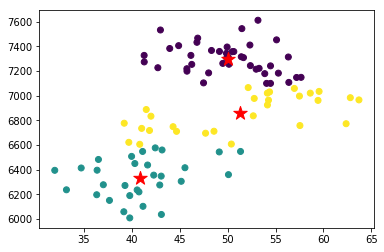

In [12]:
plt.scatter(df.Duration, df.Distance, c=y_kmeans)
plt.scatter(centers[:,0], centers[:,1], marker='*', s=200, c='red')

In [13]:
pd.Series(y_kmeans).value_counts()

0    42
1    30
2    28
dtype: int64

In [14]:
df['Route'] = y_kmeans
df.head()

,Duration,Distance,Route
0,37.66,6151.0,1
1,54.06,7100.0,0
2,41.99,6834.0,2
3,42.44,6577.0,1
4,46.25,7254.0,0


In [15]:
df[df.Route == 0].describe()

,Duration,Distance,Route
count,42.000000,42.000000,42.0
mean,50.037381,7297.619048,0.0
std,4.364794,123.854350,0.0
min,41.280000,7100.000000,0.0
25%,46.810000,7216.000000,0.0
50%,50.100000,7307.500000,0.0
75%,53.250000,7365.000000,0.0
max,57.660000,7612.000000,0.0


In [16]:
df[df.Route == 1].describe()

,Duration,Distance,Route
count,30.000000,30.00000,30.0
mean,40.845333,6330.40000,1.0
std,4.539939,164.33494,0.0
min,31.950000,6009.00000,1.0
25%,38.035000,6224.00000,1.0
50%,40.645000,6352.00000,1.0
75%,43.022500,6447.00000,1.0
max,51.340000,6577.00000,1.0


In [17]:
df[df.Route == 2].describe()

,Duration,Distance,Route
count,28.000000,28.000000,28.0
mean,51.235357,6858.321429,2.0
std,7.764527,150.190263,0.0
min,39.200000,6606.000000,2.0
25%,43.722500,6730.750000,2.0
50%,52.720000,6862.500000,2.0
75%,57.502500,6987.250000,2.0
max,63.700000,7066.000000,2.0
